<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [46]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [ ]:
# Answer:
movies.dtypes

#### Calculate the average movie duration.

In [ ]:
# Answer:
movies.loc[:,'duration'].mean()

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [ ]:
# Answer:
movies.sort_values('duration', ascending=True)

#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [ ]:
# Answer:
axis = movies.hist(bins =100);

#### Use a box plot to display that same data.

In [ ]:
# Answer:
movies.boxplot()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [ ]:
# Answer:
movies.loc[:, 'content_rating'].value_counts()

#### Use a visualization to display that same data, including a title and x and y labels.

In [ ]:
# Answer:
plt.xlabel("Movie Rating")
plt.ylabel("Count of Movies")
plt.title("Movies by Rating Type")
movies.loc[:,'content_rating'].value_counts().plot('bar');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

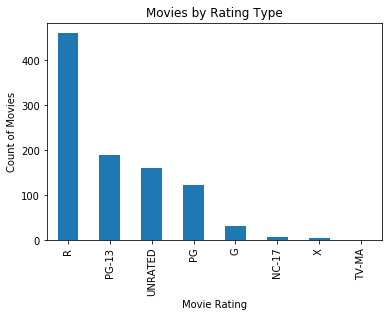

In [34]:
# Answer:
#UNRATED = pd.merge("NOT RATED", "APPROVED", "PASSED" , "GP", on='content_rating')

movies['content_rating'] = movies['content_rating'].replace({'NOT RATED':'UNRATED', 'APPROVED' : 'UNRATED', 'PASSED': 'UNRATED', 'GP': 'UNRATED'})

plt.xlabel("Movie Rating")
plt.ylabel("Count of Movies")
plt.title("Movies by Rating Type")
movies.loc[:,'content_rating'].value_counts().plot('bar');

#### Convert the following content ratings to "NC-17": X, TV-MA.

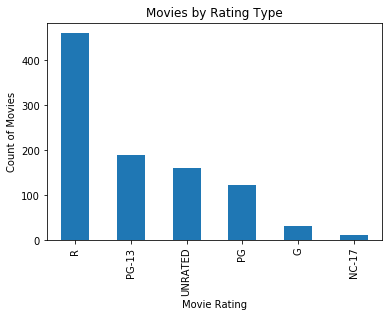

In [35]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace({'X':'NC-17', 'TV-MA' : 'NC-17'})

plt.xlabel("Movie Rating")
plt.ylabel("Count of Movies")
plt.title("Movies by Rating Type")
movies.loc[:,'content_rating'].value_counts().plot('bar');

#### Count the number of missing values in each column.

In [83]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [84]:
no_rating = movies.loc[:,'content_rating'].isna()
movies.loc[no_rating, :]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [85]:
# Answer:

movies.iat[187, 2] = "PG"
movies.iat[649, 2] = "PG"
movies.iat[936, 2] = "R"

movies.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
# Answer:
movie_time = movies.loc[:,'duration']>=120                                      # define movies longer than 2 hours
star_rating_long_mov= movies.loc[movie_time, 'star_rating' ].mean()             # groups movies longer than 2 hours by mean of star rating

movie_time2 = movies.loc[:,'duration']<=120                                     # define movies shorter than 2 hours
star_rating_short_mov= movies.loc[movie_time2, 'star_rating'].mean()            # groups movies shorter than 2 hours by mean of star rating



print('Rating for longer than 2 hours ',star_rating_long_mov, 'Rating for less than 2 hours ',star_rating_short_mov)           # comparing the star ratings of two movies cat

Rating for longer than 2 hours  7.948898678414082 Rating for less than 2 hours  7.8384898710865345


#### Use a visualization to detect whether there is a relationship between duration and star rating.

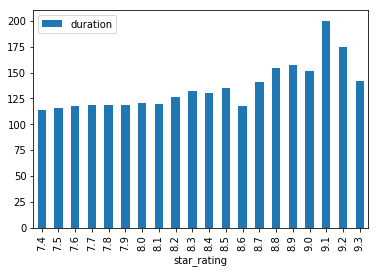

In [14]:
# Answer:
movies.groupby('star_rating').mean().plot(kind='bar'); # star rating grouped mean in a bar graph 

#### Calculate the average duration for each genre.

In [8]:
# Answer:
movies.groupby('genre')['duration'].mean()     # genre and move length mean

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

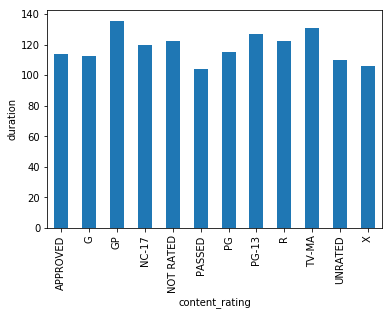

In [203]:
# Answer:
plt.ylabel("duration")
movies.groupby('content_rating')['duration'].mean().plot(kind='bar');  # content rating and their average duration in a bar graph

#### Find the title of the movie with the highest star rating in each genre

In [222]:
# Answer
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first() # star rating in decending order group by genre displaing only the first tile in each genre

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [14]:
# Answer:
dupe_titles = movies.loc[movies.loc[:, 'title'].duplicated()].title # defines var for duplicated titles in movies title 
movies.loc[movies.loc[:,'title'].isin(dupe_titles)] # list all movies in movies with same titles

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [ ]:
The movies have different actors so they are not duplicated movies

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [234]:
movies.loc[:, 'genre'].value_counts() # counts movies in genre

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [17]:
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery'] # these are the genres with 10 or more movies

movies.loc[movies.loc[:, 'genre'].isin(top_genres)].groupby('genre')['star_rating'].mean() # movies in top genres grouped by star rating

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [18]:
# Answer:
genre_counts = movies.loc[:,'genre'].value_counts()                                        # var that count number of movies in each genre

hi_genres = genre_counts[genre_counts >= 10].index                                         # var that defines number of genre with 10 or more movies

movies.loc[movies.loc[:, 'genre'].isin(hi_genres)].groupby('genre')['star_rating'].mean()  # movies in hi genres grouped by star rating  

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [178]:
# Answer:
movies.groupby('genre')['star_rating'].mean()                  # I stopped here

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [187]:
# Answer:
movies.groupby('genre').agg({'star_rating': ['mean','count'] })

star_rating      
                 mean count
genre                      
Action       7.884559   136
Adventure    7.933333    75
Animation    7.914516    62
Biography    7.862338    77
Comedy       7.822436   156
Crime        7.916935   124
Drama        7.902518   278
Family       7.850000     2
Fantasy      7.700000     1
Film-Noir    8.033333     3
History      8.000000     1
Horror       7.806897    29
Mystery      7.975000    16
Sci-Fi       7.920000     5
Thriller     7.680000     5
Western      8.255556     9

## Bonus

#### Figure out something "interesting" using the actors data!